# Miniproyecto
Alumnos: 
José Alberto López Álvarez              
Irving Daniel Estrada López            
América Victoria Ramírez Cámara  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os

In [2]:
os.chdir('/Users/irvingestrada/Documents/Maestría/9- Procesamiento y Clasificacion de Datos/Felidae/')

In [3]:
f = os.listdir()[1:]
f.sort()

In [4]:
data = []
target = []
# new_size = (224,224)
new_size = (224,224)

# iteration by folders
for folder in f:
    os.chdir(folder)
    for file in os.listdir():
        # opening and resizing the image
        img = PIL.Image.open(file)
        img_res = np.array(img.resize(new_size))
        
        # adding data and target to arrays
        data.append(img_res)
        target.append(folder)
    os.chdir('..')

In [5]:
try:
    data = np.array(data)
    target = np.array(target)
except:
    print('Problem with broadcast')

Problem with broadcast


/var/folders/41/vdjdsv_91l3fnv_9v2c830940000gn/T/ipykernel_2866/3198010212.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [6]:
wrong_imgs_idx = []

# checking if all pics are in RGB and adding incorrect indexes to list
for idx,img in enumerate(data):
    try:
        if img.shape[2] != 3:
            wrong_imgs_idx.append(idx)
    except:
        if len(img.shape) != 3:
            wrong_imgs_idx.append(idx)

In [7]:
a = 0
for idx in wrong_imgs_idx:
    del data[idx-a]
    del target[idx-a]
    a += 1

In [8]:
try:
    data = np.array(data)
    target = np.array(target)
except:
    print('Problem with broadcast')

In [9]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder()
target_n = lbl.fit_transform(target)

In [10]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

x_train, x_test, y_train, y_test = train_test_split(data,target_n,test_size=0.10,stratify=target)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.22)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('x_val shape:', x_val.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print('y_val shape:', y_val.shape)

Init Plugin
Init Graph Optimizer
Init Kernel
x_train shape: (168, 224, 224, 3)
x_test shape: (25, 224, 224, 3)
x_val shape: (48, 224, 224, 3)
y_train shape: (168,)
y_test shape: (25,)
y_val shape: (48,)


In [11]:
x_train_n = x_train / 255
x_test_n = x_test / 255
y_train_cat = to_categorical(y_train,num_classes=len(set(y_train)))
y_test_cat = to_categorical(y_test,num_classes=len(set(y_test)))

In [12]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers,optimizers
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
from keras import initializers

In [13]:
x_train_n[0].shape

(224, 224, 3)

In [14]:
def model_create():
    model = Sequential()
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=x_train_n[0].shape,
                                 padding='same'))
    model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.15))

    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.Conv2D(filters=256,kernel_size=(3,3),activation='relu', padding='same'))
    model.add(layers.MaxPool2D(pool_size=(3,3)))
    model.add(layers.BatchNormalization())
    
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=1024,activation='sigmoid'))
    model.add(layers.Dropout(0.25))
    model.add(layers.Dense(units=128,activation='sigmoid'))
    model.add(layers.Dense(units=5,activation='softmax'))
    return model

model = model_create()

Metal device set to: Apple M1


2022-07-06 16:23:20.201286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-06 16:23:20.201414: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


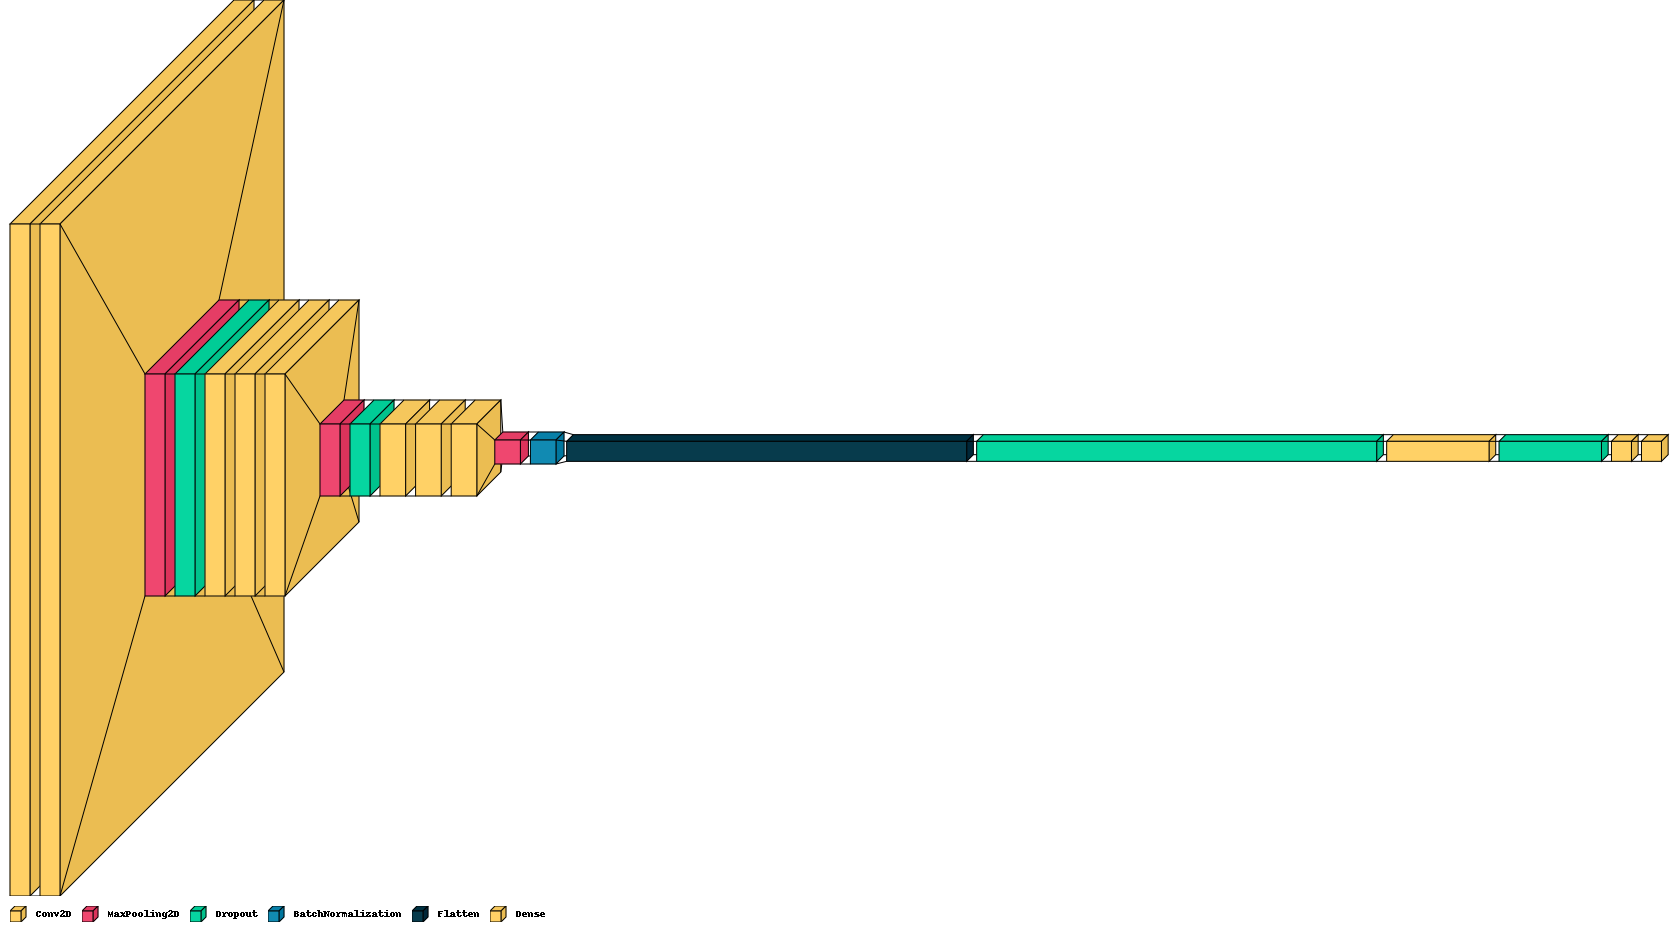

In [15]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=3, legend=True,)

In [16]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25,restore_best_weights=True)

history = model.fit(x_train_n, y_train_cat,epochs=200,validation_data=(x_test_n, y_test_cat), callbacks=[es])

2022-07-06 16:23:20.447002: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-06 16:23:20.448971: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/200


2022-07-06 16:23:20.786438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 2.1709 - accuracy: 0.2143

2022-07-06 16:23:26.533616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 6s 957ms/step - loss: 2.1709 - accuracy: 0.2143 - val_loss: 2.0852 - val_accuracy: 0.2000
Epoch 2/200
6/6 [==============================] - 5s 765ms/step - loss: 1.3380 - accuracy: 0.3869 - val_loss: 2.1621 - val_accuracy: 0.2000
Epoch 3/200
6/6 [==============================] - 5s 807ms/step - loss: 1.2488 - accuracy: 0.4524 - val_loss: 2.2478 - val_accuracy: 0.2000
Epoch 4/200
6/6 [==============================] - 5s 811ms/step - loss: 1.2539 - accuracy: 0.4881 - val_loss: 2.4075 - val_accuracy: 0.2000
Epoch 5/200
6/6 [==============================] - 5s 827ms/step - loss: 1.1701 - accuracy: 0.4821 - val_loss: 2.4059 - val_accuracy: 0.2000
Epoch 6/200
6/6 [==============================] - 5s 834ms/step - loss: 1.0393 - accuracy: 0.5595 - val_loss: 2.2632 - val_accuracy: 0.2400
Epoch 7/200
6/6 [==============================] - 5s 803ms/step - loss: 0.9878 - accuracy: 0.6131 - val_loss: 2.4669 - val_accuracy: 0.2000
Epoch 8/200
6/6 [========

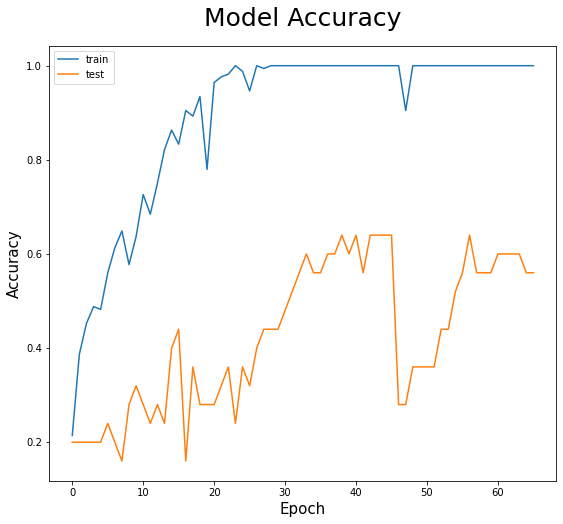

In [18]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

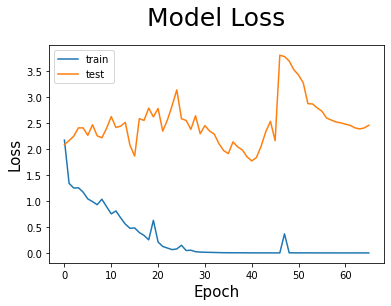

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
y_pred = model.predict(x_test_n).argmax(1)
y_true = y_test

2022-07-06 16:28:42.218770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [21]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
set(lbl.inverse_transform(y_test))

{'Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger'}

In [22]:
cm = confusion_matrix(y_true,y_pred)

Text(0.5, 15.0, 'Predicted label')

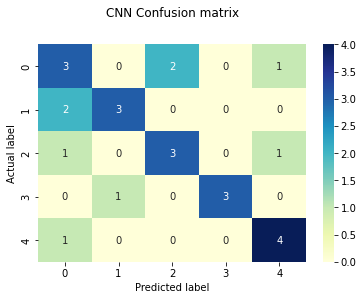

In [23]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('CNN Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [24]:
print(classification_report(y_true,y_pred))
print(accuracy_score(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.75      0.60      0.67         5
           2       0.60      0.60      0.60         5
           3       1.00      0.75      0.86         4
           4       0.67      0.80      0.73         5

    accuracy                           0.64        25
   macro avg       0.69      0.65      0.66        25
weighted avg       0.67      0.64      0.65        25

0.64


### CNN Validation

In [25]:
y_pred = model.predict(x_val).argmax(1)
y_true = y_val

2022-07-06 16:28:42.630850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [26]:
cm = confusion_matrix(y_true,y_pred)

Text(0.5, 15.0, 'Predicted label')

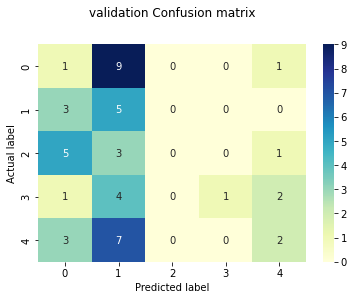

In [27]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('validation Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print(classification_report(y_true,y_pred))
print(accuracy_score(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.09      0.08        11
           1       0.18      0.62      0.28         8
           2       0.00      0.00      0.00         9
           3       1.00      0.12      0.22         8
           4       0.33      0.17      0.22        12

    accuracy                           0.19        48
   macro avg       0.32      0.20      0.16        48
weighted avg       0.30      0.19      0.16        48

0.1875


/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## CNN con aumentage data

In [19]:
os.chdir('..')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest', 
    validation_split = .25
)

valid_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split = .25
)

data_dir = 'Felidae'

train_data = train_datagen.flow_from_directory(data_dir, target_size = new_size, class_mode = 'categorical',
                                        subset = 'training')

val_data = valid_datagen.flow_from_directory(data_dir, target_size = new_size, class_mode = 'categorical',
                                        subset = 'validation')

Found 183 images belonging to 5 classes.
Found 60 images belonging to 5 classes.


In [31]:
model2 = model_create()

In [32]:
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

history = model2.fit_generator(
    generator=train_data,
    validation_data=val_data,
    epochs=200,
    callbacks=es
)

/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200


2022-07-06 16:28:44.281050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 1.9942 - accuracy: 0.2459

2022-07-06 16:28:51.001329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 9s 1s/step - loss: 1.9942 - accuracy: 0.2459 - val_loss: 1.7040 - val_accuracy: 0.2000
Epoch 2/200
6/6 [==============================] - 8s 1s/step - loss: 1.6729 - accuracy: 0.2514 - val_loss: 1.6934 - val_accuracy: 0.2000
Epoch 3/200
6/6 [==============================] - 9s 2s/step - loss: 1.6973 - accuracy: 0.2350 - val_loss: 1.7159 - val_accuracy: 0.2000
Epoch 4/200
6/6 [==============================] - 10s 2s/step - loss: 1.5962 - accuracy: 0.2732 - val_loss: 1.7479 - val_accuracy: 0.2000
Epoch 5/200
6/6 [==============================] - 11s 2s/step - loss: 1.5848 - accuracy: 0.2787 - val_loss: 1.7362 - val_accuracy: 0.2000
Epoch 6/200
6/6 [==============================] - 12s 2s/step - loss: 1.5248 - accuracy: 0.3169 - val_loss: 1.7599 - val_accuracy: 0.2000
Epoch 7/200
6/6 [==============================] - 13s 2s/step - loss: 1.4460 - accuracy: 0.3552 - val_loss: 1.8289 - val_accuracy: 0.2000
Epoch 8/200
6/6 [=========================

Epoch 60/200
6/6 [==============================] - 8s 1s/step - loss: 1.0638 - accuracy: 0.4809 - val_loss: 3.4493 - val_accuracy: 0.2000
Epoch 61/200
6/6 [==============================] - 7s 1s/step - loss: 1.0049 - accuracy: 0.5246 - val_loss: 3.2860 - val_accuracy: 0.2000
Epoch 62/200
6/6 [==============================] - 8s 1s/step - loss: 1.0519 - accuracy: 0.5355 - val_loss: 1.3578 - val_accuracy: 0.4167
Epoch 63/200
6/6 [==============================] - 7s 1s/step - loss: 0.9373 - accuracy: 0.5519 - val_loss: 1.7200 - val_accuracy: 0.3167
Epoch 64/200
6/6 [==============================] - 8s 1s/step - loss: 0.9913 - accuracy: 0.5628 - val_loss: 1.3110 - val_accuracy: 0.3500
Epoch 65/200
6/6 [==============================] - 7s 1s/step - loss: 0.9505 - accuracy: 0.6011 - val_loss: 0.9883 - val_accuracy: 0.4667
Epoch 66/200
6/6 [==============================] - 7s 1s/step - loss: 1.0202 - accuracy: 0.5246 - val_loss: 0.9007 - val_accuracy: 0.5333
Epoch 67/200
6/6 [=========

Epoch 119/200
6/6 [==============================] - 7s 1s/step - loss: 1.0562 - accuracy: 0.5683 - val_loss: 2.3648 - val_accuracy: 0.3833
Restoring model weights from the end of the best epoch.
Epoch 00119: early stopping


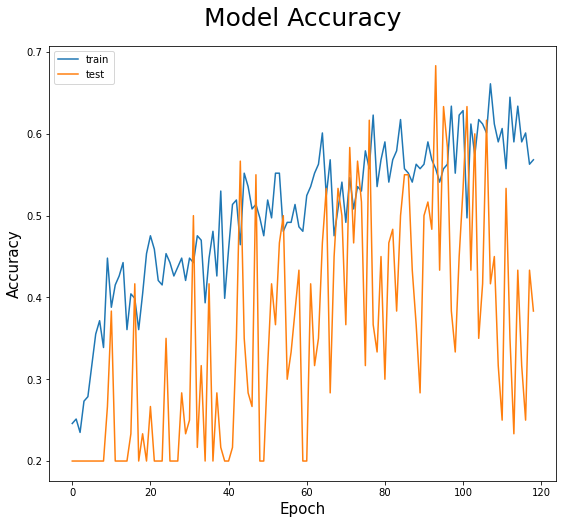

In [33]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

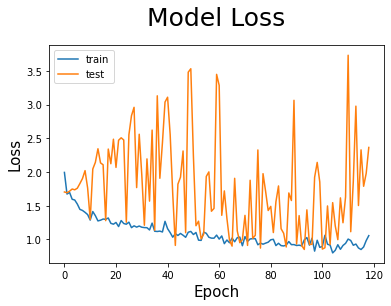

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [35]:
y_pred2 = model2.predict(x_test_n).argmax(1)
y_true = y_test

2022-07-06 16:45:30.853070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [36]:
classes = ['Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger']

In [37]:
cm = confusion_matrix(y_true,y_pred2)

Text(0.5, 15.0, 'Predicted label')

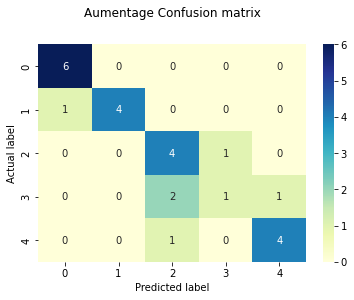

In [38]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Aumentage Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
print(classification_report(y_true,y_pred2))
print(accuracy_score(y_true,y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5
           2       0.57      0.80      0.67         5
           3       0.50      0.25      0.33         4
           4       0.80      0.80      0.80         5

    accuracy                           0.76        25
   macro avg       0.75      0.73      0.72        25
weighted avg       0.76      0.76      0.75        25

0.76


### Aumentage Validation

In [40]:
y_pred = model2.predict(x_val).argmax(1)
y_true = y_val

2022-07-06 16:45:31.238102: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [41]:
cm = confusion_matrix(y_true,y_pred)

En los datos de validación podemos destacar que la matriz de confusión está sesgada en la parte del chita y el leopardo. De la misma forma que el modelo pasado.

Text(0.5, 15.0, 'Predicted label')

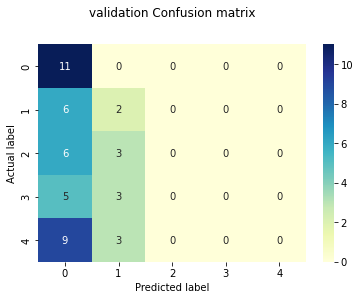

In [42]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('validation Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print(classification_report(y_true,y_pred))
print(accuracy_score(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46        11
           1       0.18      0.25      0.21         8
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        12

    accuracy                           0.27        48
   macro avg       0.10      0.25      0.13        48
weighted avg       0.10      0.27      0.14        48

0.2708333333333333


/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## VGG16

In [12]:
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import preprocess_input
vgg16 = VGG16(input_shape=x_train_n[0].shape, weights='imagenet',include_top=False)
for layer in vgg16.layers: 
    layer.trainable = False

Metal device set to: Apple M1


2022-07-07 15:49:02.039379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-07 15:49:02.039498: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
from tensorflow.keras import layers,optimizers 
x1 = layers.Flatten()(vgg16.output)
x2 = layers.Dense(5,activation='softmax')(x1) 
model = Model(inputs=vgg16.input,outputs=x2)

In [14]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

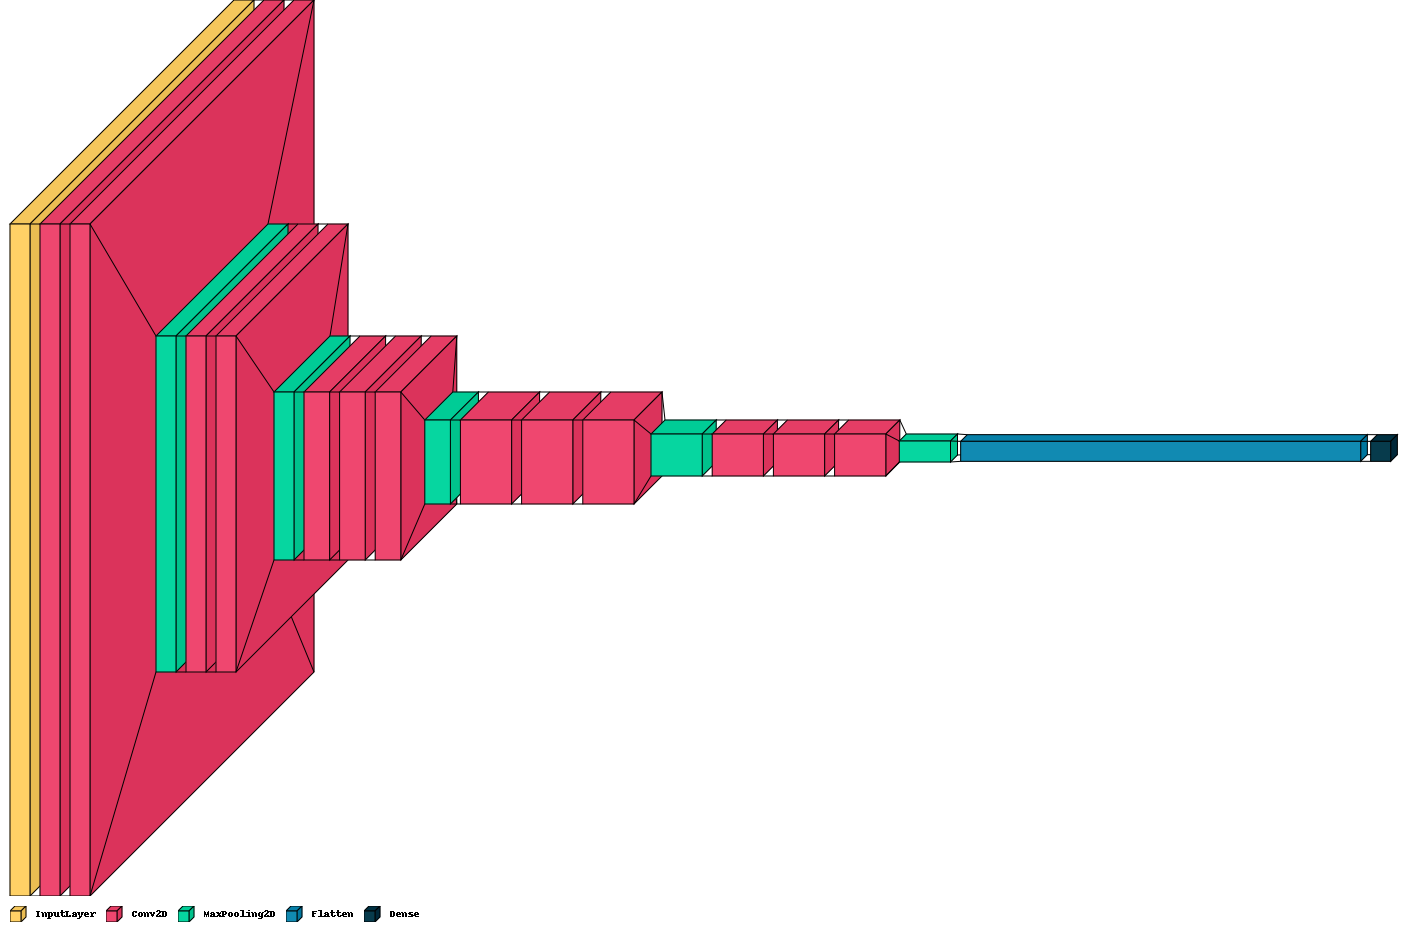

In [15]:
# Visualizing our model (Hidden Input)
import visualkeras
visualkeras.layered_view(model, scale_xy=3, legend=True,)

In [21]:
from tensorflow.keras.callbacks import TensorBoard,ModelCheckpoint,EarlyStopping
es = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10,restore_best_weights=True)

In [22]:
history = model.fit_generator( 
    generator=train_data,
    validation_data=val_data,
    epochs=100,
    callbacks=es )

/Users/irvingestrada/miniforge3/envs/tensorflow/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-07-07 15:49:24.295674: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-07 15:49:24.296958: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/100


2022-07-07 15:49:24.559437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - ETA: 0s - loss: 6.5072 - accuracy: 0.2787

2022-07-07 15:49:35.595299: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 16s 2s/step - loss: 6.5072 - accuracy: 0.2787 - val_loss: 2.5918 - val_accuracy: 0.4167
Epoch 2/100
6/6 [==============================] - 8s 1s/step - loss: 2.1676 - accuracy: 0.4699 - val_loss: 0.9551 - val_accuracy: 0.6500
Epoch 3/100
6/6 [==============================] - 7s 1s/step - loss: 2.2637 - accuracy: 0.3880 - val_loss: 2.0145 - val_accuracy: 0.4667
Epoch 4/100
6/6 [==============================] - 7s 1s/step - loss: 2.5812 - accuracy: 0.3333 - val_loss: 2.3227 - val_accuracy: 0.5833
Epoch 5/100
6/6 [==============================] - 7s 1s/step - loss: 1.3234 - accuracy: 0.6120 - val_loss: 0.9337 - val_accuracy: 0.6000
Epoch 6/100
6/6 [==============================] - 6s 992ms/step - loss: 1.7098 - accuracy: 0.4863 - val_loss: 2.5738 - val_accuracy: 0.4500
Epoch 7/100
6/6 [==============================] - 6s 980ms/step - loss: 1.8181 - accuracy: 0.4918 - val_loss: 1.1990 - val_accuracy: 0.6000
Epoch 8/100
6/6 [======================

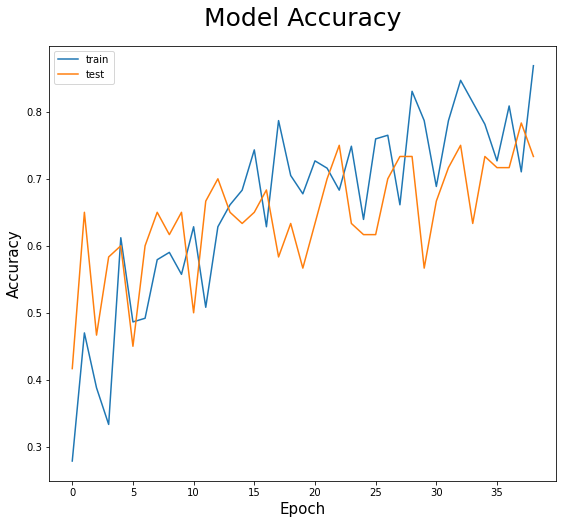

In [23]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

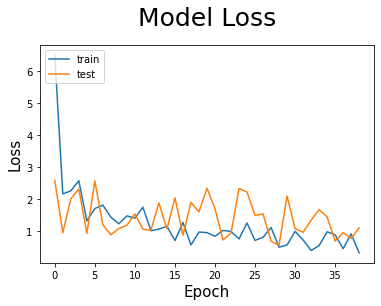

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
y_pred3 = model.predict(x_test_n).argmax(1)
y_true = y_test

2022-07-07 15:53:43.987868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [26]:
classes = ['Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger']

In [27]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [28]:
cm = confusion_matrix(y_true,y_pred3)

Text(0.5, 15.0, 'Predicted label')

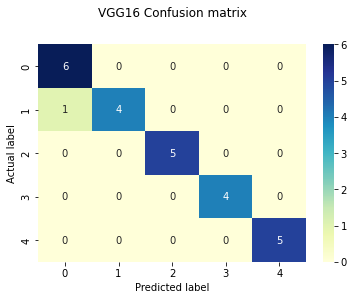

In [29]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('VGG16 Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [30]:
print(classification_report(y_true,y_pred3))
print(accuracy_score(y_true,y_pred3))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.80      0.89         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         5

    accuracy                           0.96        25
   macro avg       0.97      0.96      0.96        25
weighted avg       0.97      0.96      0.96        25

0.96


## VGG16 Validacion

In [35]:
y_pred3 = model.predict(x_val).argmax(1)
y_true = y_val

In [36]:
classes = ['Cheetah', 'Leopard', 'Lion', 'Puma', 'Tiger']

In [37]:
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [38]:
cm = confusion_matrix(y_true,y_pred3)

Text(0.5, 15.0, 'Predicted label')

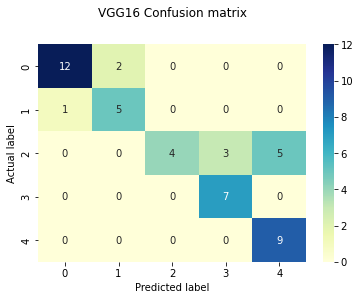

In [39]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('VGG16 Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print(classification_report(y_true,y_pred3))
print(accuracy_score(y_true,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        14
           1       0.71      0.83      0.77         6
           2       1.00      0.33      0.50        12
           3       0.70      1.00      0.82         7
           4       0.64      1.00      0.78         9

    accuracy                           0.77        48
   macro avg       0.80      0.80      0.75        48
weighted avg       0.83      0.77      0.75        48

0.7708333333333334


## Referencias

- JULIEN CALENGE. (Mayo 12 del 2022). Felidae | Cat species recognition. 30 de junio del 2022, de Kaggle Sitio web: https://www.kaggle.com/datasets/juliencalenge/felidae-tiger-lion-cheetah-leopard-puma



- Irving Estrada. Github. 2022,Sitio web: https://github.com/Irving-Estrada/Procesamiento​


- François Chollet. (2022). Keras Documentation. 6 de Julio 2022, de Keras Sitio web: https://keras.io


- Chuanqi Tan, Fuchun Sun, Tao Kong, Wenchang Zhang, Chao Yang, and Chunfang Liu. (2018). A Survey on Deep Transfer Learning. pringer Nature ,270-279.